In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [99]:
Melb = pd.read_csv('./data_project/melbourne-housing-market/Melbourne_housing_FULL.csv')
pd.set_option('display.max_columns', None)
Melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [100]:
Melb.shape

(34857, 21)

In [101]:
Melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [102]:
Melb.count()

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            27247
Method           34857
SellerG          34857
Date             34857
Distance         34856
Postcode         34856
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
CouncilArea      34854
Lattitude        26881
Longtitude       26881
Regionname       34854
Propertycount    34854
dtype: int64

In [4]:
Melb.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
# as price is what we are looking to predict in terms of a model, any missing datasets without price are less useful
# so we remove those rows missing price.

Melb.dropna(subset = ['Price'], inplace=True)

In [6]:
Melb.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
print('Type',set(Melb['Type']))
print('Method',set(Melb['Method']))
print('Postcode',set(Melb['Postcode']))
print('Regionname',set(Melb['Regionname']))
print('Suburb',set(Melb['Suburb']))
print('CouncilArea',set(Melb['CouncilArea']))
print('Regionname',set(Melb['Regionname']))

Type {'h', 'u', 't'}
Method {'VB', 'SP', 'PI', 'SA', 'S'}
Postcode {3072.0, 3073.0, 3074.0, 3075.0, 3076.0, nan, 3078.0, 3079.0, 3081.0, 3082.0, 3083.0, 3084.0, 3085.0, 3087.0, 3088.0, 3089.0, 3090.0, 3093.0, 3094.0, 3095.0, 3096.0, 3099.0, 3101.0, 3102.0, 3103.0, 3104.0, 3105.0, 3106.0, 3107.0, 3108.0, 3109.0, 3111.0, 3113.0, 3115.0, 3116.0, 3121.0, 3122.0, 3123.0, 3124.0, 3125.0, 3126.0, 3127.0, 3128.0, 3130.0, 3131.0, 3132.0, 3133.0, 3134.0, 3135.0, 3136.0, 3137.0, 3138.0, 3139.0, 3140.0, 3141.0, 3142.0, 3143.0, 3144.0, 3145.0, 3146.0, 3147.0, 3148.0, 3149.0, 3150.0, 3151.0, 3152.0, 3153.0, 3154.0, 3155.0, 3156.0, 3158.0, 3160.0, 3161.0, 3162.0, 3163.0, 3165.0, 3166.0, 3167.0, 3168.0, 3169.0, 3170.0, 3171.0, 3172.0, 3173.0, 3174.0, 3175.0, 3177.0, 3178.0, 3179.0, 3180.0, 3181.0, 3182.0, 3183.0, 3184.0, 3185.0, 3186.0, 3187.0, 3188.0, 3189.0, 3190.0, 3191.0, 3192.0, 3193.0, 3194.0, 3195.0, 3196.0, 3197.0, 3198.0, 3199.0, 3200.0, 3201.0, 3202.0, 3204.0, 3205.0, 3206.0, 3207.0, 3750.0,

In [8]:
Melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,27247.000000,2.724700e+04,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,20993.000000,20993.000000,27244.000000
mean,2.992293,1.050173e+06,11.280276,3113.796080,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,-37.806963,144.996711,7566.781089
std,0.954795,6.414671e+05,6.787469,111.139676,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,0.091619,0.120680,4492.382418
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,-37.860900,144.925300,4294.000000
50%,3.000000,8.700000e+05,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6567.000000
75%,4.000000,1.295000e+06,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,-37.748970,145.068770,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


In [ ]:
# some notes:
# some properties with 0 bedrooms and bathrooms - possibly plots sold
# same goes for BuildingArea and Landsize - a 0 building area indicates plots/land sale, if there is a landsize
# an outlier in year built (doubt there was housing built in 1196!)
# more missing values/data in the Landsize, BuildingArea and YearBuilt, than others, so perhaps less useful. 
#    - indicates these are less in focus in advertising the property, but could be very relevant, tho just less publicised.

In [9]:
Melb.groupby('CouncilArea').mean()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
CouncilArea,,,,,,,,,,,,,
Banyule City Council,3.139327,9.363689e+05,11.944955,3084.622512,3.181653,1.591281,1.722479,607.297118,157.579183,1971.608985,-37.731501,145.075845,4385.402883
Bayside City Council,3.197559,1.574122e+06,13.428528,3188.486651,3.288958,1.888430,1.946225,563.248193,206.930689,1966.980469,-37.935016,145.019745,7102.416476
Boroondara City Council,3.153175,1.667326e+06,7.923452,3119.899206,3.207407,1.824775,1.854787,621.440828,191.891704,1957.287523,-37.823305,145.066018,7770.539683
Brimbank City Council,3.225476,6.821819e+05,13.229356,3026.584187,3.256291,1.528425,1.963173,567.090806,154.759766,1979.826855,-37.753211,144.820510,4994.327233
Cardinia Shire Council,3.730769,5.729231e+05,44.269231,3806.230769,3.681818,1.954545,1.727273,1242.352941,189.056429,1994.937500,-38.045547,145.444056,10969.961538
Casey City Council,3.449275,6.832374e+05,32.811594,3741.905797,3.479339,1.892562,2.126050,775.412500,173.167385,1988.148649,-38.026188,145.290891,9353.753623
Darebin City Council,2.785441,9.023185e+05,8.551596,3069.879949,2.840317,1.352775,1.672404,453.271034,126.280929,1958.378882,-37.741684,144.999139,13754.925926
Frankston City Council,3.301310,6.979241e+05,37.267686,3269.436681,3.375000,1.630208,2.072917,810.361290,165.170708,1976.316239,-38.137148,145.149440,11104.528384
Glen Eira City Council,2.917833,1.116693e+06,11.613999,3175.534388,2.944908,1.584307,1.737238,454.412440,154.497298,1967.537143,-37.906567,145.049225,7165.667681


C:\Users\morte\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morte\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


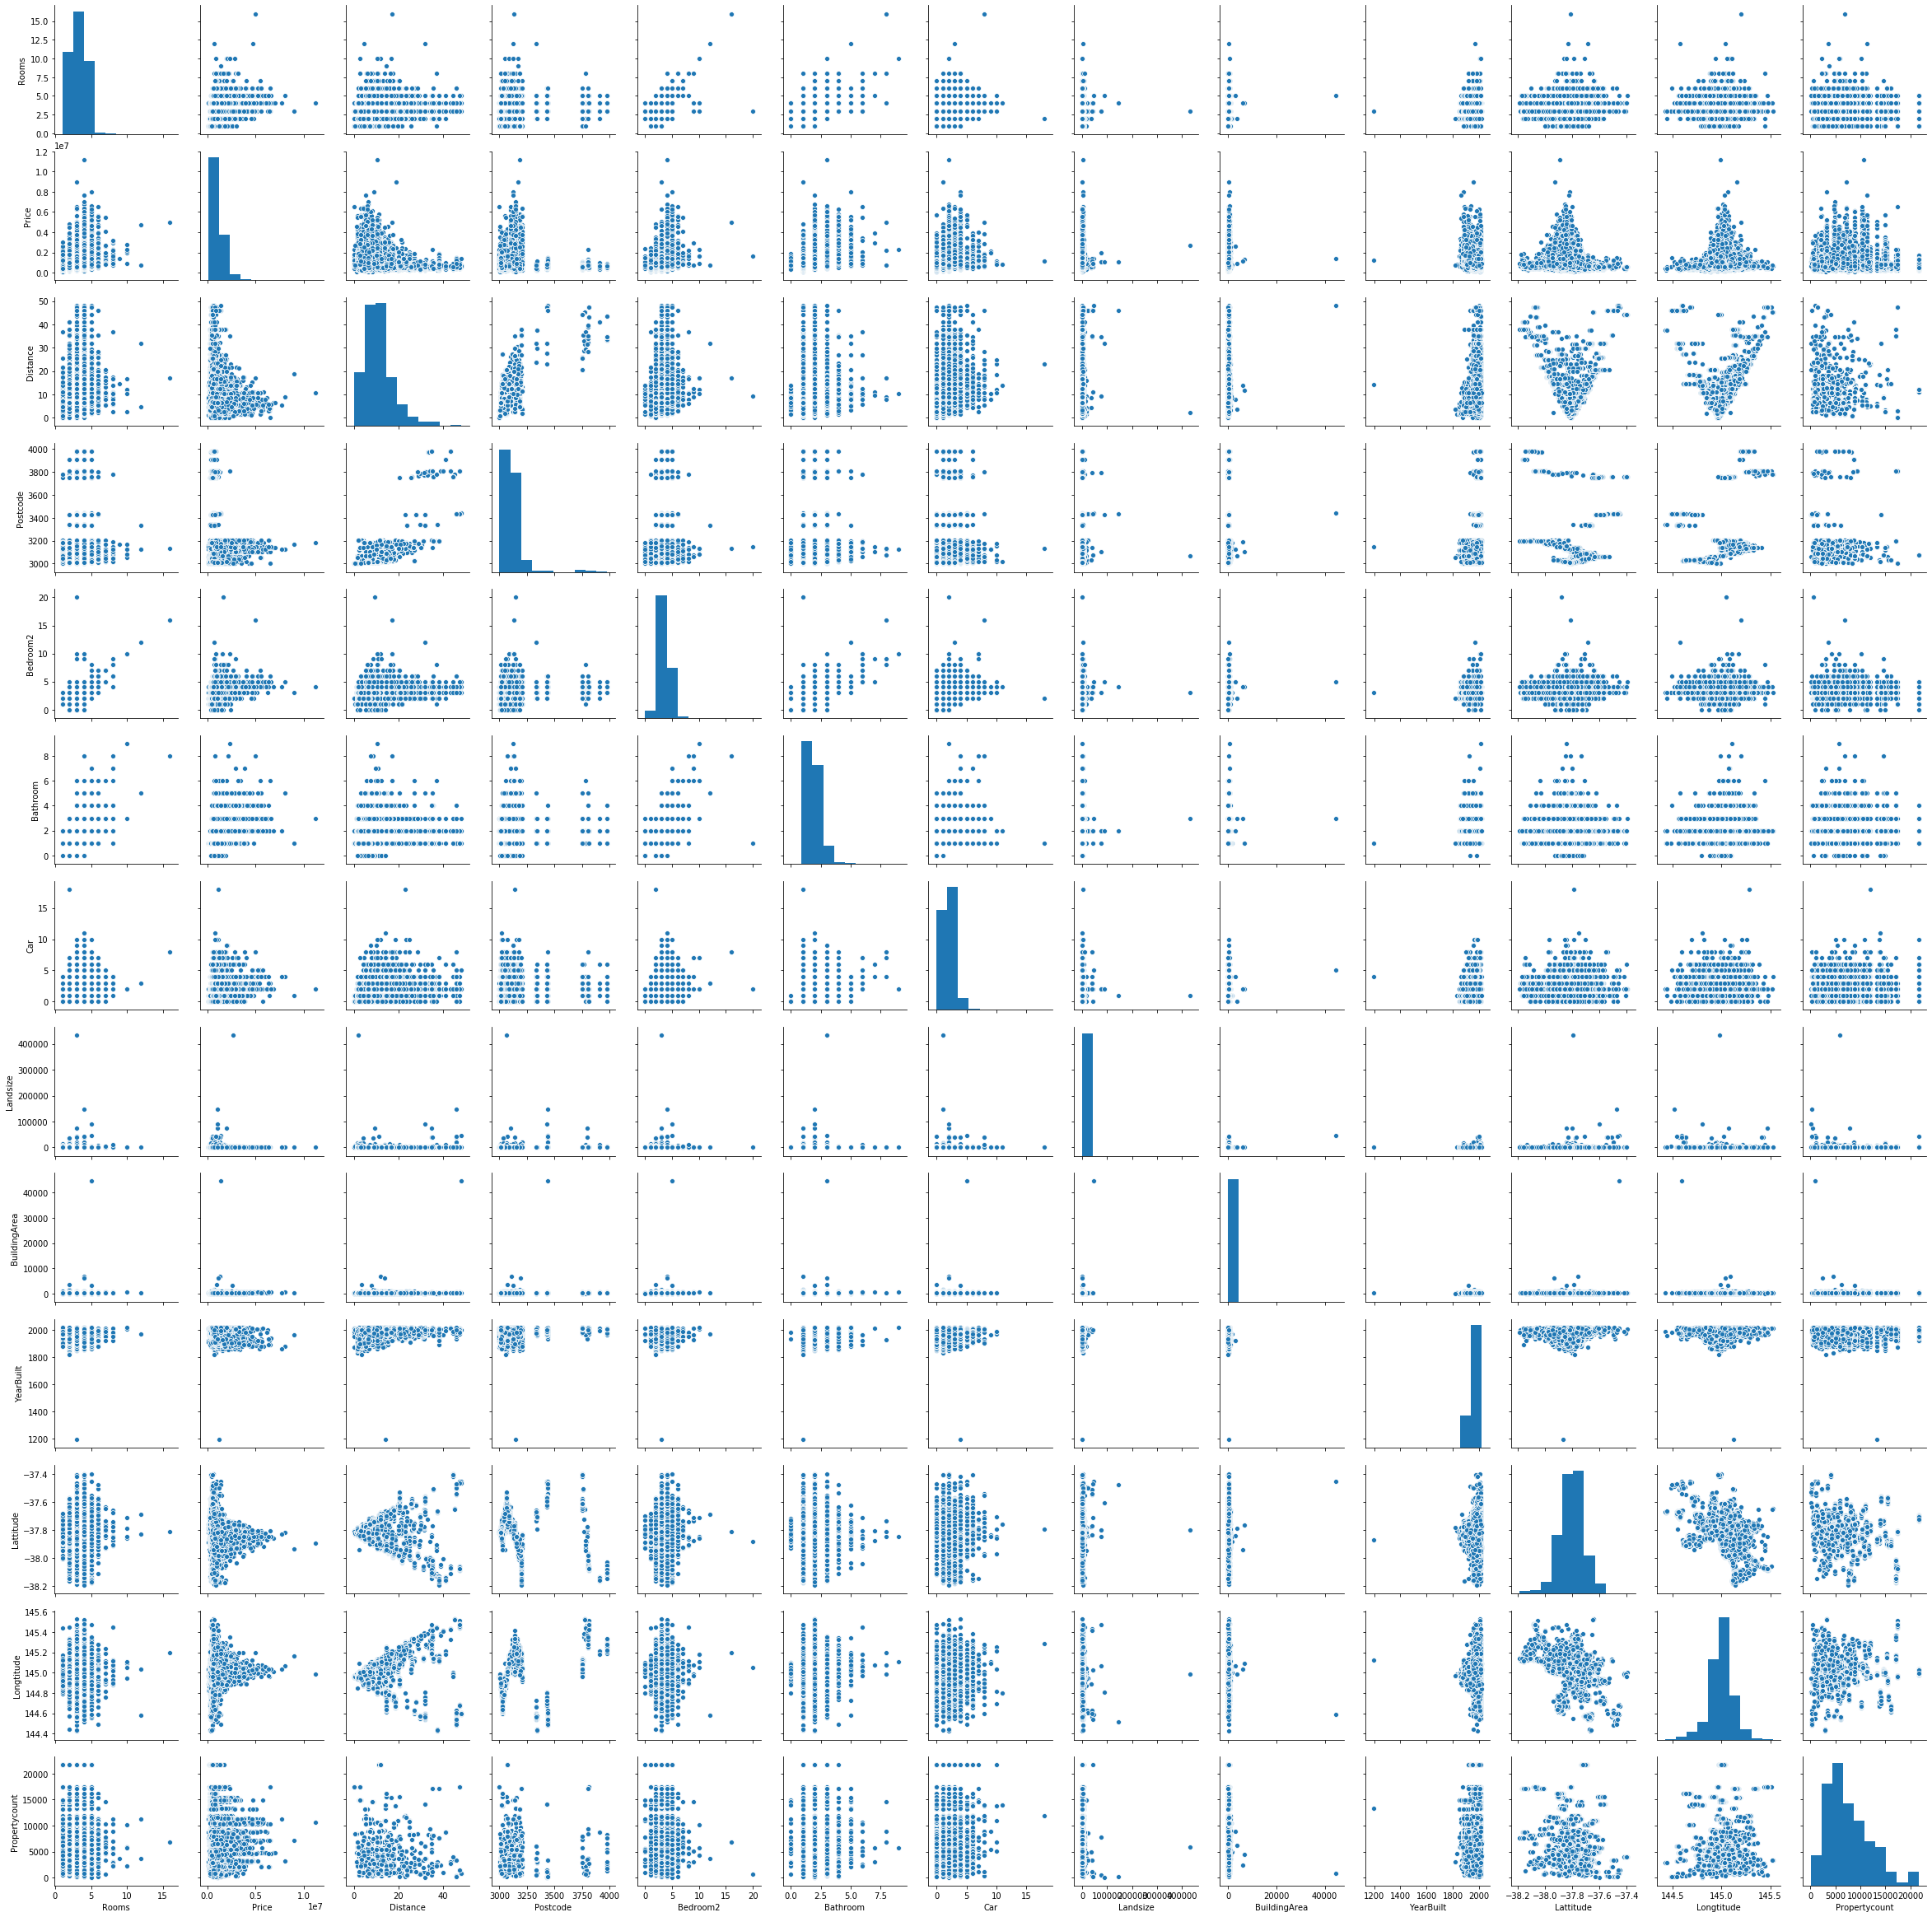

In [285]:
import seaborn as sns
sns.pairplot(Melb)

In [ ]:
#looks like some anomalies in distributions w Landsize, BuildingArea and YearBuilt. 
#Need to examine each for any outliers/errors in the dataset.

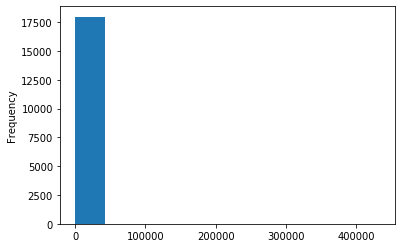

In [10]:
Melb['Landsize'].plot.hist()

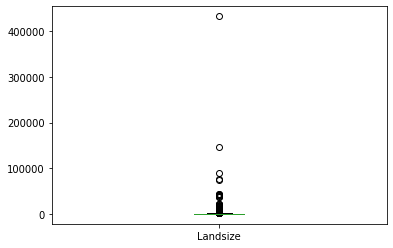

In [11]:
Melb['Landsize'].plot.box()

In [12]:
#clearly an extreme outlier, also indicated in the maximum value in the description summary.

In [13]:
Melb['Landsize'].max()

433014.0

In [14]:
Melb[Melb['Landsize'] == 433014]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0


In [15]:
#looks same for BuildingArea, so need to see if it is the same outlier

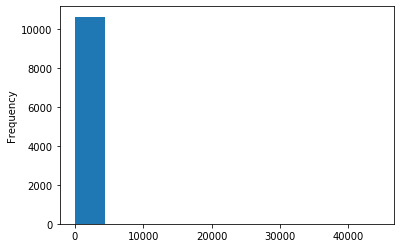

In [16]:
Melb['BuildingArea'].plot.hist()

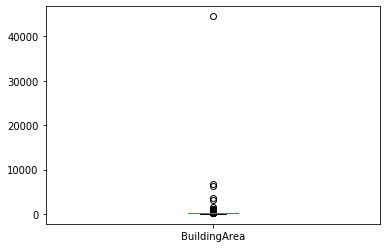

In [17]:
Melb['BuildingArea'].plot.box()

In [18]:
Melb['BuildingArea'].max()

44515.0

In [19]:
Melb[Melb['BuildingArea'] == 44515]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0,NaN,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0


In [20]:
# not the same outlier, but the large building does not look to correspond w price ($1.4m for a 44,500sq m land size),
# and buildingArea is larger than landsize.

#as both are far outliers, and hard to explain why, best to remove them from the dataset.

In [21]:
Melb.drop(22632, inplace = True)
Melb.drop(18036, inplace = True)

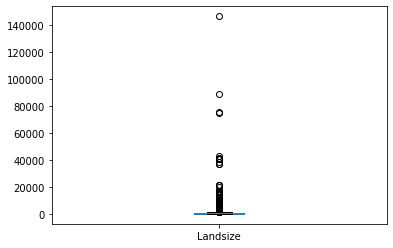

In [22]:
Melb['Landsize'].plot.box()

In [23]:
# YearBuilt also looks to have an outlier, 

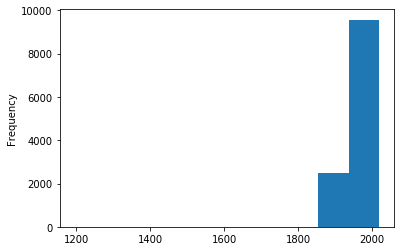

In [24]:
Melb['YearBuilt'].plot.hist()

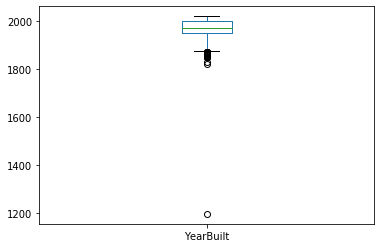

In [25]:
Melb['YearBuilt'].plot.box()

In [26]:
Melb['YearBuilt'].min()

1196.0

In [27]:
Melb[Melb['YearBuilt'] == 1196]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,3.0,1.0,4.0,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0


In [28]:
#looks like a typo in the data, likely built in 1996 instead of 1196. Therefore need to replace that value

Melb.at[16424, 'YearBuilt'] = 1996

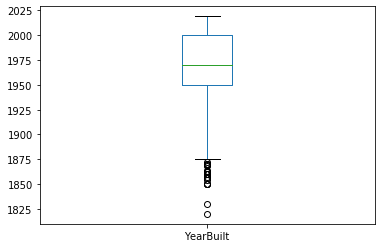

In [29]:
Melb['YearBuilt'].plot.box()

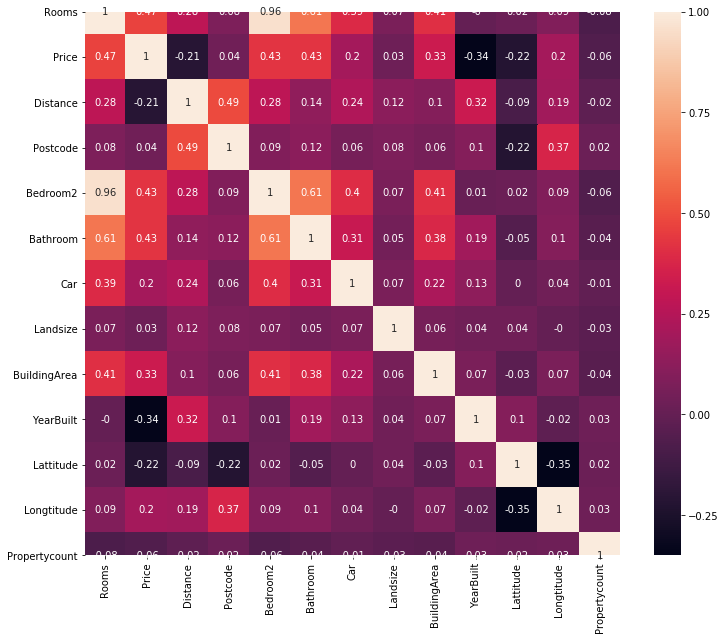

In [30]:
correlation_matrix = Melb.corr().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True);

In [31]:
#Correlated features w Pricing would look to be :

# Rooms
# Bedroom2 (poss multicollinearity w Rooms)
# Bathroom
# YearBuilt (-ve corr) 
# Distance (-ve corr)
# Car (low'ish corr)

# all make intuitive sense, but likely need to run regression and then Ridge, Lasso and ElasticNet to 

In [32]:
Melb.to_csv('Melb_housing_data_clean.csv')

In [33]:
Melb_small = Melb

Melb_small.dropna(subset = ['BuildingArea'], inplace=True)

#seeing if narrowing dataset to smaller size by removing any NaN values in smallest column (BuildingArea),
# that is also a correlated variable, and hence likely to be used in the regression. 

In [34]:
Melb_small.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               177
Landsize         1274
BuildingArea        0
YearBuilt         406
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64

In [35]:
Melb_small.dropna(subset = ['YearBuilt'], inplace=True)
# to eliminate null values in last remaining needed variable set.

In [36]:
Melb_small.shape

(10249, 21)

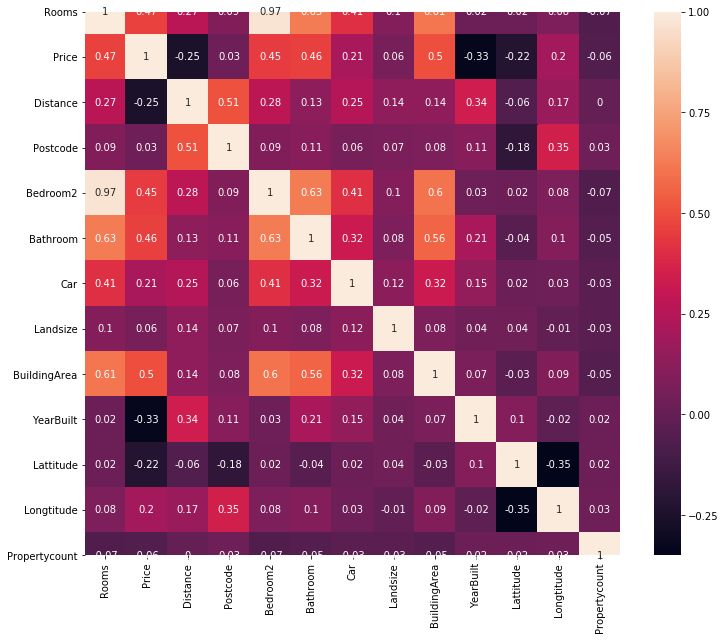

In [37]:
#how does smaller dataset (w less Nan values) change the correlations?

correlation_matrix = Melb_small.corr().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True)


In [38]:
#saving smaller dataset

Melb_small.to_csv('Melb_small.csv')

In [48]:
Melb_small.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [52]:
Melb_data = Melb_small.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG',
       'Date',  'Postcode', 'Bedroom2', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'], axis=1)

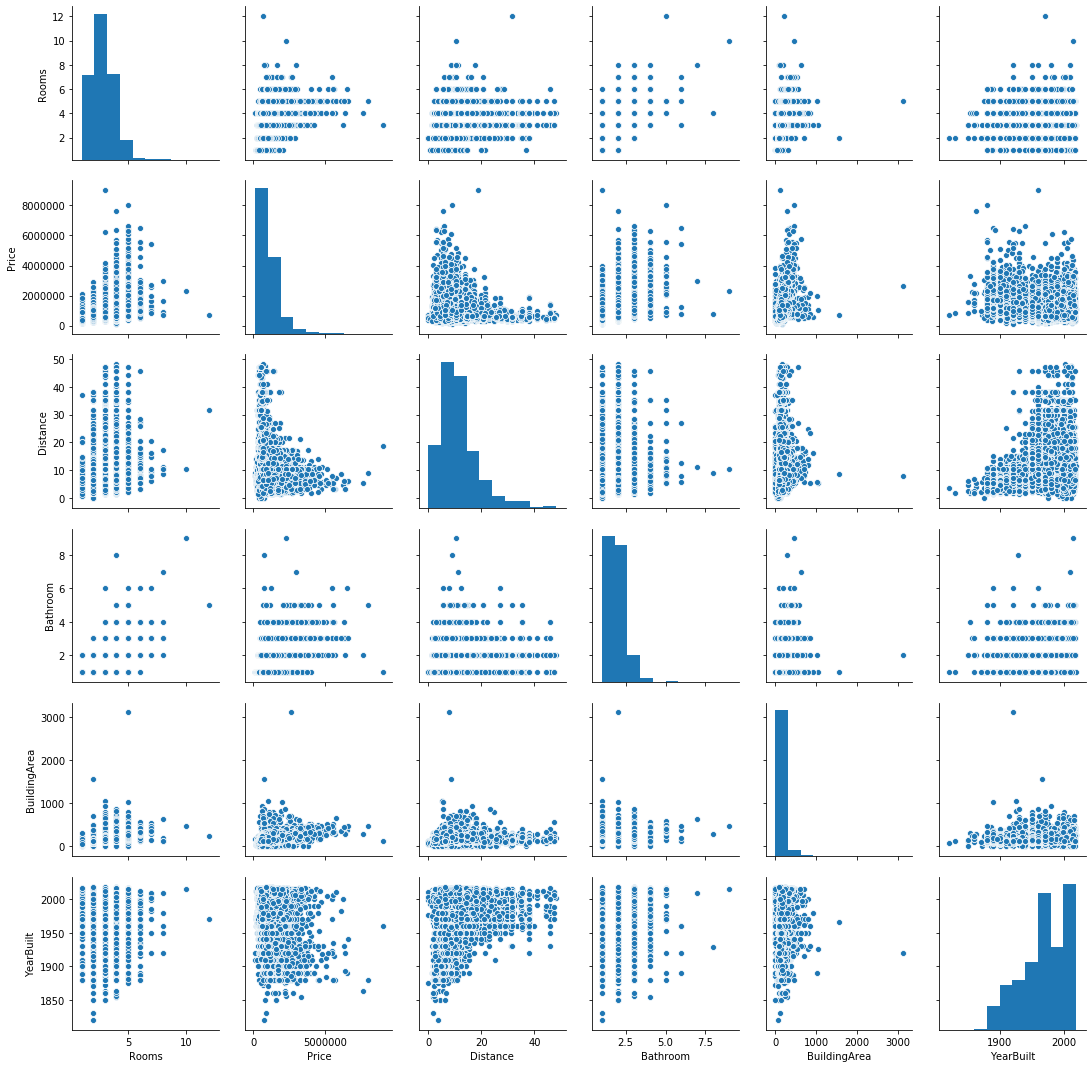

In [53]:
sns.pairplot(Melb_data)

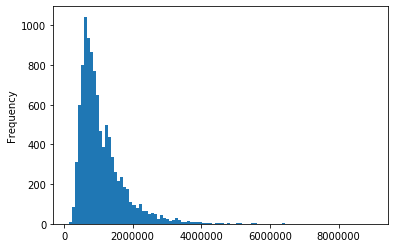

In [57]:
Melb_small['Price'].plot.hist(bins = 100)

In [59]:
Melb_data.describe()

,Rooms,Price,Distance,Bathroom,BuildingArea,YearBuilt
count,10249.000000,1.024900e+04,10249.000000,10249.000000,10249.000000,10249.000000
mean,3.107425,1.087401e+06,11.451517,1.653039,149.886752,1966.461118
std,0.960517,6.770553e+05,7.073221,0.716307,87.340565,36.509186
min,1.000000,1.310000e+05,0.000000,1.000000,0.000000,1820.000000
25%,3.000000,6.400000e+05,6.400000,1.000000,100.000000,1950.000000
50%,3.000000,8.950000e+05,10.400000,2.000000,132.000000,1970.000000
75%,4.000000,1.335000e+06,14.300000,2.000000,180.560000,2000.000000
max,12.000000,9.000000e+06,48.100000,9.000000,3112.000000,2019.000000


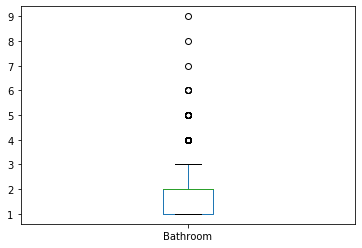

In [64]:
Melb_small['Bathroom'].plot.box()

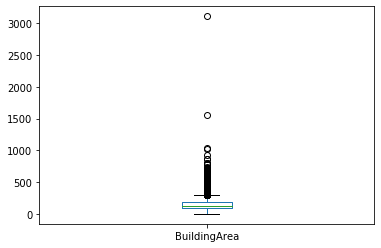

In [65]:
Melb_small['BuildingArea'].plot.box()

In [76]:
Melb_small.sort_values('BuildingArea', inplace = True)

In [75]:
Melb_small.drop(2704, inplace = True)

KeyError: '[2704] not found in axis'

In [78]:
Melb_small.head(50)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
23321,Moorabbin,7 Walsh Av,3,h,1290000.0,S,Ray,26/08/2017,14.3,3189.0,3.0,1.0,1.0,580.0,0.0,1970.0,Kingston City Council,-37.94492,145.04938,Southern Metropolitan,2555.0
31464,Balwyn North,4 Beverley Ct,4,t,1190000.0,VB,Bekdon,3/03/2018,9.7,3104.0,4.0,2.0,2.0,260.0,0.0,2017.0,Boroondara City Council,-37.79589,145.09988,Southern Metropolitan,7809.0
23242,Kew,16 Hodgson St,5,h,3450000.0,PI,Kay,26/08/2017,5.4,3101.0,5.0,2.0,2.0,668.0,0.0,2006.0,Boroondara City Council,-37.80795,145.01474,Southern Metropolitan,10331.0
23159,Glen Iris,6 Viva St,4,h,2690000.0,PI,Marshall,26/08/2017,7.3,3146.0,4.0,2.0,2.0,647.0,0.0,1910.0,Boroondara City Council,-37.86133,145.04167,Southern Metropolitan,10412.0
23127,Fitzroy,471 George St,3,h,1311000.0,SP,Peter,26/08/2017,2.1,3065.0,3.0,1.0,1.0,NaN,0.0,1910.0,Yarra City Council,-37.79563,144.98218,Northern Metropolitan,5825.0
23115,Epping,26 Lowalde Dr,3,h,595000.0,S,hockingstuart,26/08/2017,19.6,3076.0,3.0,1.0,2.0,536.0,0.0,1980.0,Whittlesea City Council,-37.64972,145.04086,Northern Metropolitan,10926.0
23378,Port Melbourne,44 Garton St,4,t,2455000.0,SP,Marshall,26/08/2017,3.5,3207.0,4.0,3.0,2.0,123.0,0.0,2010.0,Melbourne City Council,-37.83349,144.94840,Southern Metropolitan,8648.0
33899,Wollert,40 Whitebark St,4,h,615000.0,S,HAR,17/03/2018,25.5,3750.0,4.0,2.0,2.0,392.0,0.0,2015.0,Whittlesea City Council,-37.61252,145.04288,Northern Metropolitan,2940.0
33660,Preston,91 Dundas St,3,h,950000.0,PI,Spencer,17/03/2018,8.4,3072.0,3.0,1.0,NaN,301.0,0.0,1935.0,Darebin City Council,-37.75302,145.00948,Northern Metropolitan,14577.0
23022,Bundoora,37 Greenwood Dr,4,h,815000.0,S,Ray,26/08/2017,12.1,3083.0,4.0,2.0,1.0,525.0,0.0,1965.0,Banyule City Council,-37.70765,145.05556,Northern Metropolitan,10175.0


In [84]:
Melb_clean = Melb_data[Melb_data!=0].dropna()

Melb_clean.shape

In [85]:
Melb_clean.shape

(10184, 6)

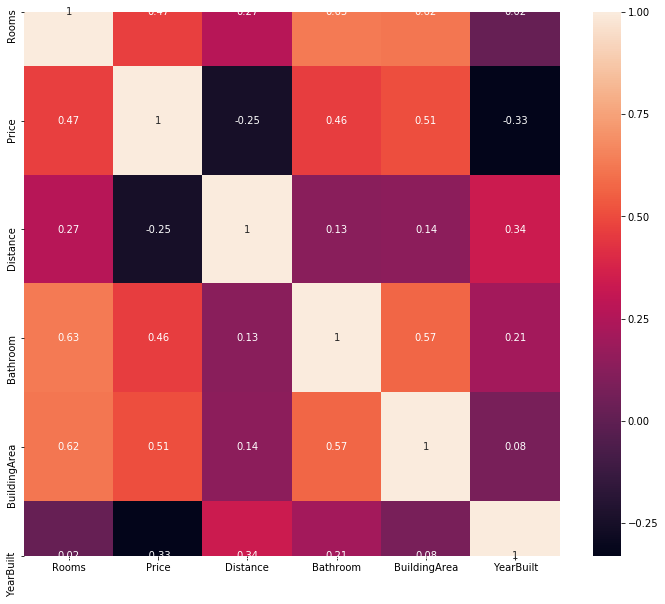

In [88]:
correlation_matrix = Melb_clean.corr().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True)


In [86]:
Melb_clean.describe()

,Rooms,Price,Distance,Bathroom,BuildingArea,YearBuilt
count,10184.000000,1.018400e+04,10184.000000,10184.000000,10184.000000,10184.000000
mean,3.106638,1.087718e+06,11.447368,1.653476,150.804332,1966.416438
std,0.960692,6.771813e+05,7.067630,0.717079,86.840024,36.521307
min,1.000000,1.310000e+05,0.700000,1.000000,1.000000,1820.000000
25%,3.000000,6.400000e+05,6.400000,1.000000,101.000000,1950.000000
50%,3.000000,8.950000e+05,10.400000,2.000000,133.000000,1970.000000
75%,4.000000,1.335000e+06,14.300000,2.000000,181.000000,2000.000000
max,12.000000,9.000000e+06,48.100000,9.000000,3112.000000,2019.000000


In [87]:
Melb_clean.to_csv('Melb_clean.csv')